## Code for Charting ESG Final Presentation 

In [24]:
# Set-up steps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import altair as alt
import warnings
import textwrap
from pandas.errors import SettingWithCopyWarning 

warnings.filterwarnings("ignore")

endowment_df = pd.read_excel('endowment_chart_data.xlsx')

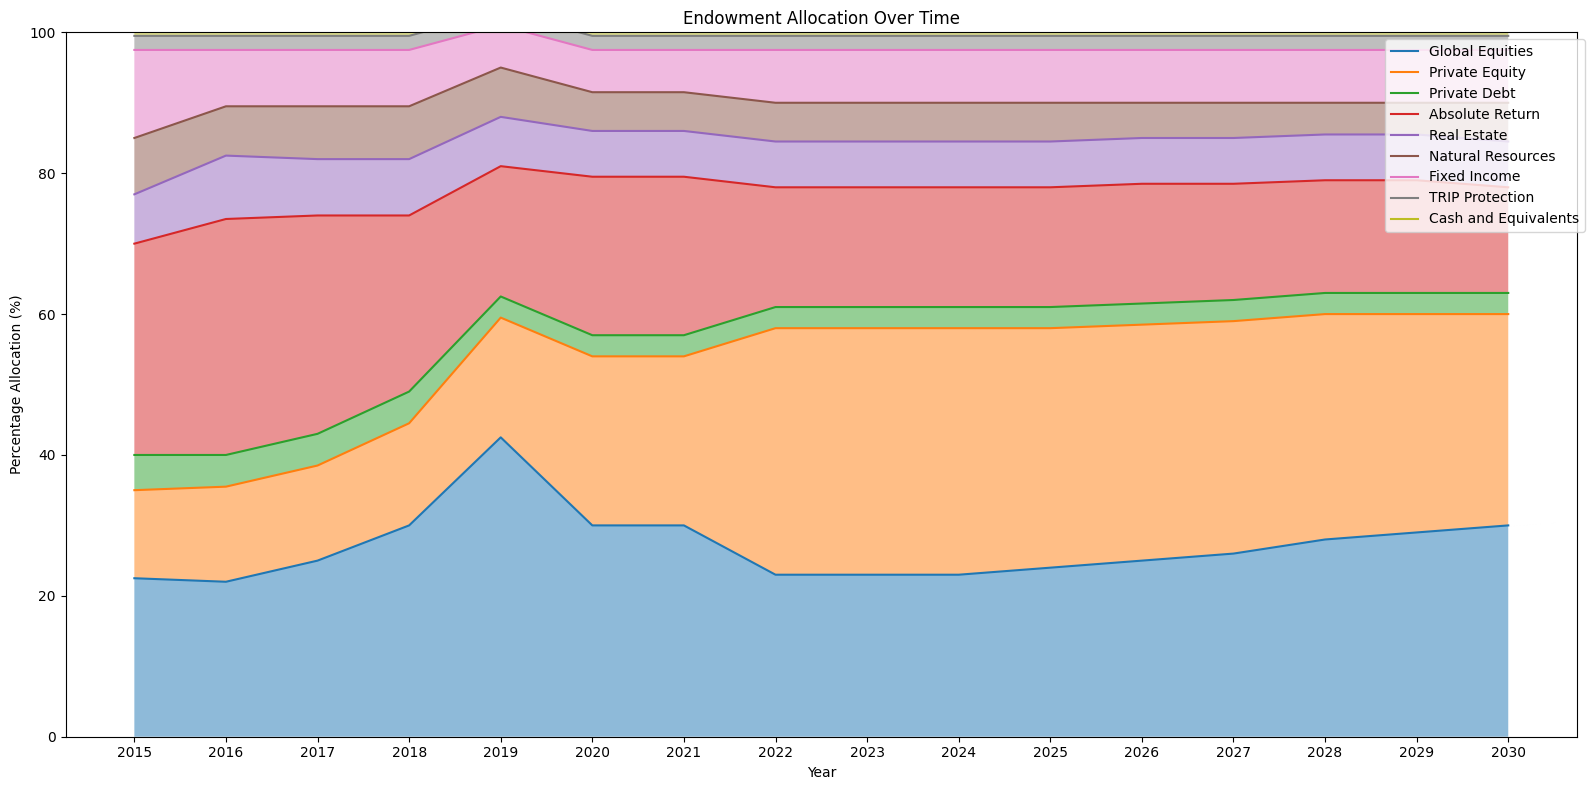

In [25]:
# Stacked percentage chart builder

# Extract data
asset_types = endowment_df["Asset Type"].tolist()
years = [int(col) for col in endowment_df.columns if isinstance(col, (int, float))]
allocations_transposed = endowment_df[years].values

# Transpose the allocation data
allocations = allocations_transposed.T

# Create the Stacked Percentage Line Graph
fig, ax = plt.subplots(figsize=(16, 8))

cumulative_percentages = np.cumsum(allocations, axis=1)

ax.plot(years, cumulative_percentages[:, 0], label=asset_types[0])
ax.fill_between(years, 0, cumulative_percentages[:, 0], alpha=0.5)

for i in range(1, len(asset_types)):
    ax.plot(years, cumulative_percentages[:, i], label=asset_types[i])
    ax.fill_between(years, cumulative_percentages[:, i - 1], cumulative_percentages[:, i], alpha=0.5)

ax.set_xlabel("Year")
ax.set_ylabel("Percentage Allocation (%)")
ax.set_title("Endowment Allocation Over Time")
ax.set_xticks(years)
ax.set_ylim(0, 100)
ax.legend(loc="upper right", bbox_to_anchor=(1.01, 1.0))
plt.subplots_adjust(right= 0.75)

plt.tight_layout()
plt.show()

In [36]:
print(endowment_df)

             Asset Type  2015  2016  2017  2018  2019  2020  2021  2022  2023  \
0       Global Equities  22.5  22.0  25.0  30.0  42.5  30.0  30.0  23.0  23.0   
1        Private Equity  12.5  13.5  13.5  14.5  17.0  24.0  24.0  35.0  35.0   
2          Private Debt   5.0   4.5   4.5   4.5   3.0   3.0   3.0   3.0   3.0   
3       Absolute Return  30.0  33.5  31.0  25.0  18.5  22.5  22.5  17.0  17.0   
4           Real Estate   7.0   9.0   8.0   8.0   7.0   6.5   6.5   6.5   6.5   
5     Natural Resources   8.0   7.0   7.5   7.5   7.0   5.5   5.5   5.5   5.5   
6          Fixed Income  12.5   8.0   8.0   8.0   6.0   6.0   6.0   7.5   7.5   
7       TRIP Protection   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
8  Cash and Equivalents   0.5   0.5   0.5   0.5  -3.0   0.5   0.5   0.5   0.5   

   2024  2025  2026  2027  2028  2029  2030 Categories  
0  23.0  24.0  25.0  26.0  28.0  29.0  30.0         GE  
1  35.0  34.0  33.5  33.0  32.0  31.0  30.0         PE  
2   3.0   3.0   3.

In [37]:
# Stacked percentage chart builder

# Melt the DataFrame to long format
df_melted = endowment_df.drop(columns=['Categories']).melt(id_vars="Asset Type", var_name="Year", value_name="Percentage")
df_melted["Year"] = pd.to_numeric(df_melted["Year"])

# sorting the data for the chart
df_melted["Percentage"] = df_melted["Percentage"].apply(lambda x: max(0, x))
 
# Adjust percentages to sum to 100%
def adjust_percentages(group):
    total = group["Percentage"].sum()
    if total != 100:
        group["Percentage"] = (group["Percentage"] / total) * 100
    return group

df_melted = df_melted.groupby("Year").apply(adjust_percentages).reset_index(drop=True)

# sorting the data for the chart
df_melted['Cumulative Percentage'] = df_melted.groupby('Year')['Percentage'].cumsum()
asset_type_order = df_melted.groupby("Asset Type")["Percentage"].sum().sort_values().index.tolist()

# custom colour scheme
colour_scale = alt.Scale(domain=asset_type_order,
                       range=['#C68220', '#9A5324', '#642822', '#616530', '#3E3E23',
                              '#0F425C', '#767676', '#D6D6CE', '#800000'])  


# Create the Altair chart
chart = alt.Chart(df_melted).mark_area().encode(
    x=alt.X("Year:Q", axis=alt.Axis(format=".0f")),
    y=alt.Y("Percentage:Q", scale=alt.Scale(domain=[0, 100])),
    color=alt.Color("Asset Type:N", sort=asset_type_order, scale= colour_scale),
    tooltip=["Year:Q", "Asset Type:N", "Percentage:Q"]
).properties(
    title="Endowment Allocation Over Time"
).configure_legend(
    orient='right'
)

chart.show()

alt.Chart(...)